# Project 1 Artificial Intelligence 

In [110]:
import json
import csv
import pandas as pd
import numpy as np
import sklearn.feature_extraction.text as tfidf
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model, preprocessing,utils
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from matplotlib.pyplot import figure, show
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

## Code to convert JSON data into a tabular format Pandas can read

In [2]:
#code to convert JSON data into a tabular format Pandas can read

outfile1 = open("business.tsv",'w')
bfile = csv.writer(outfile1, delimiter ="\t", quoting=csv.QUOTE_MINIMAL)
bfile.writerow(['business_id','review_count','stars'])
with open('business.json') as f:
    for line in f:
                row1 = json.loads(line)
# some special char must be encoded in 'utf-8'
                bfile.writerow([row1['business_id'],row1['review_count'],row1['stars']])
    outfile1.close()
    df1= pd.read_csv('business.tsv', delimiter ="\t", encoding="utf-8")




In [3]:
df1.head()

,business_id,review_count,stars
0,1SWheh84yJXfytovILXOAQ,5,3.0
1,QXAEGFB4oINsVuTFxEYKFQ,128,2.5
2,gnKjwL_1w79qoiV3IC_xQQ,170,4.0
3,xvX2CttrVhyG2z1dFg_0xw,3,5.0
4,HhyxOkGAM07SRYtlQ4wMFQ,4,4.0


In [4]:
#convert json to tsv with few table columns

outfile = open("review.tsv", 'w')
sfile = csv.writer(outfile, delimiter ="\t", quoting=csv.QUOTE_MINIMAL)
sfile.writerow(['business_id','stars', 'text'])
with open('review.json') as f:
    for line in f:
        row = json.loads(line)
        # some special char must be encoded in 'utf-8'
        sfile.writerow([row['business_id'], row['stars'], (row['text']).encode('utf-8')])
    outfile.close()
    df= pd.read_csv('review.tsv', delimiter ="\t", encoding="utf-8")



In [5]:
df.head()

,business_id,stars,text
0,ujmEBvifdJM6h6RLv4wQIg,1.0,b'Total bill for this horrible service? Over $...
1,NZnhc2sEQy3RmzKTZnqtwQ,5.0,"b""I *adore* Travis at the Hard Rock's new Kell..."
2,WTqjgwHlXbSFevF32_DJVw,5.0,"b""I have to say that this office really has it..."
3,ikCg8xy5JIg_NGPx-MSIDA,5.0,"b""Went in for a lunch. Steak sandwich was deli..."
4,b1b1eb3uo-w561D0ZfCEiQ,1.0,b'Today was my second out of three sessions I ...


## Group ALL the reviews by each business and create a new dataframe

In [6]:
df_review_agg = df.groupby('business_id')['text'].sum()
df_ready_for_sklearn = pd.DataFrame({'business_id': df_review_agg.index, 'all_reviews': df_review_agg.values})

## Merge business and reviews dataframes

In [7]:
newmerge= pd.merge(df1, df_ready_for_sklearn, on='business_id')
newmerge.head()

,business_id,review_count,stars,all_reviews
0,1SWheh84yJXfytovILXOAQ,5,3.0,"b""Don't go here if you expect consistent or re..."
1,QXAEGFB4oINsVuTFxEYKFQ,128,2.5,b'My girlfriend and I went for dinner at Emera...
2,gnKjwL_1w79qoiV3IC_xQQ,170,4.0,b'Husband was craving Chicken Teriyaki & gyoza...
3,xvX2CttrVhyG2z1dFg_0xw,3,5.0,b'The associates at this agency are absolutely...
4,HhyxOkGAM07SRYtlQ4wMFQ,4,4.0,"b""Great customer service and great job every t..."


In [8]:
bus_rev_df = newmerge[['review_count','all_reviews']]

## TF-IDF Vectorization of text coloumn

In [9]:
vectorizer = tfidf.TfidfVectorizer(stop_words='english',max_features = 1000,min_df = 10,max_df = 0.50)

In [10]:
matrix = vectorizer.fit_transform(bus_rev_df['all_reviews'])

In [11]:
matrix

<192606x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 40105782 stored elements in Compressed Sparse Row format>

In [12]:
review_array = matrix.toarray() 
review_array

array([[ 0.        ,  0.        ,  0.12629112, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02595623,  0.0357873 ,  0.        , ...,  0.00382152,
         0.        ,  0.00413052],
       [ 0.00291396,  0.01406174,  0.00580901, ...,  0.00150157,
         0.        ,  0.00811493],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

## NORMALISATION OF "REVIEW COUNT"

In [13]:
bus_rev_df['review_count'] = zscore(bus_rev_df['review_count'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
bus_rev_df.head()

,review_count,all_reviews
0,-0.259129,"b""Don't go here if you expect consistent or re..."
1,0.857675,b'My girlfriend and I went for dinner at Emera...
2,1.239022,b'Husband was craving Chicken Teriyaki & gyoza...
3,-0.277288,b'The associates at this agency are absolutely...
4,-0.268208,"b""Great customer service and great job every t..."


## Convert pandas dataframe to corresponding numpy array

In [15]:

df_toarray = bus_rev_df['review_count'].values

In [16]:
df_toarray

array([-0.25912875,  0.85767481,  1.23902236, ..., -0.17741141,
       -0.16833171, -0.27728815])

In [17]:
df_toarray.shape

(192606,)

In [18]:
review_arr = np.column_stack((df_toarray,review_array))

In [19]:
review_arr.shape

(192606, 1001)

In [20]:
star_rating_arr =newmerge['stars'].values

In [21]:
star_rating_arr.shape

(192606,)

## Spliting data to training and test data

In [22]:
#x_train,x_test,y_train,y_test = train_test_split(business_review_array,business_df_to_array,test_size=0.2,random_state=42)

x_train,x_test,y_train,y_test = train_test_split(review_arr,star_rating_arr,test_size=0.2,random_state=42)

In [23]:
x_train.shape

(154084, 1001)

In [24]:
x_test.shape

(38522, 1001)

In [25]:
x_train

array([[-0.12293319,  0.        ,  0.01289909, ...,  0.01928386,
         0.02409715,  0.        ],
       [ 2.12883333,  0.00419285,  0.01878798, ...,  0.00432118,
         0.01349937,  0.02802345],
       [-0.05029556,  0.        ,  0.01328385, ...,  0.        ,
         0.01240797,  0.        ],
       ..., 
       [-0.21373023,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.54896488,  0.00884708,  0.01067322, ...,  0.        ,
         0.        ,  0.0098551 ],
       [-0.19557082,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.0405724 ]])

In [26]:
y_test.shape

(38522,)

# LINEAR REGRESSION

In [27]:
linear_reg = linear_model.LinearRegression()

In [28]:
linear_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
y_pred = linear_reg.predict(x_test)

In [30]:
error = np.sqrt(mean_squared_error(y_test, y_pred))

In [31]:
print("Root Mean squared error: %.2f" % error)
# Explained variance score: 1 is perfect prediction
print('R2 score %.2f' % r2_score(y_test, y_pred))

Root Mean squared error: 0.55
R2 score 0.71


In [32]:
ypred_linear_reg = pd.DataFrame({'Prediction': pd.Series(y_pred)})
total_linear_regression = pd.concat([newmerge[['business_id','stars']][:5], ypred_linear_reg[:5]], axis=1)
total_linear_regression

,business_id,stars,Prediction
0,1SWheh84yJXfytovILXOAQ,3.0,2.049254
1,QXAEGFB4oINsVuTFxEYKFQ,2.5,2.486768
2,gnKjwL_1w79qoiV3IC_xQQ,4.0,3.610675
3,xvX2CttrVhyG2z1dFg_0xw,5.0,2.586192
4,HhyxOkGAM07SRYtlQ4wMFQ,4.0,2.421900


## Plotting regression model

In [33]:
def chart_regression(y_pred,y_test,sort=True):
    t = pd.DataFrame({'pred' : y_pred, 'y' : y_test.flatten()})
   # print(t.head())
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

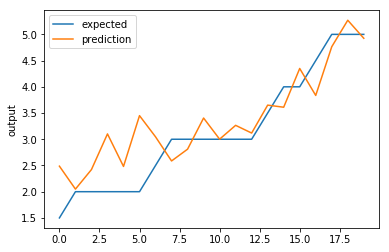

In [34]:
chart_regression(y_pred[:20].flatten(),y_test[:20],sort=True)

# Logistic Regression

In [35]:
logreg = LogisticRegression()

In [36]:
type(y_train)
print(utils.multiclass.type_of_target(y_train))

continuous


### use lable encoding since y is continuous data

In [37]:

labelencoder = LabelEncoder()


In [38]:
stars = newmerge.values

In [39]:
stars[:, 2] = labelencoder.fit_transform(stars[:, 2])

review_merge_LR = pd.DataFrame(stars)
review_merge_LR.head()


,0,1,2,3
0,1SWheh84yJXfytovILXOAQ,5,4,"b""Don't go here if you expect consistent or re..."
1,QXAEGFB4oINsVuTFxEYKFQ,128,3,b'My girlfriend and I went for dinner at Emera...
2,gnKjwL_1w79qoiV3IC_xQQ,170,6,b'Husband was craving Chicken Teriyaki & gyoza...
3,xvX2CttrVhyG2z1dFg_0xw,3,8,b'The associates at this agency are absolutely...
4,HhyxOkGAM07SRYtlQ4wMFQ,4,6,"b""Great customer service and great job every t..."


In [40]:
review_stars_LR = review_merge_LR[2].values
review_stars_LR.shape

(192606,)

In [41]:
review_stars_LR = review_stars_LR.astype('int')

### Spliting data to training and test data

In [42]:
x_train,x_test,y_train1,y_test1 = train_test_split(review_arr,review_stars_LR,test_size=0.2,random_state=42)

In [43]:
logreg.fit(x_train, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
y_pred_LR=logreg.predict(x_test)

### decoding the values

In [45]:
decode_y = (labelencoder.inverse_transform(y_pred_LR)[:10])
decode_y

array([3.0, 3.0, 3.0, 3.0, 2.5, 3.0, 5.0, 3.0, 3.5, 5.0], dtype=object)

In [46]:
ypred_log = pd.DataFrame({'Prediction': pd.Series(decode_y)})
df_total_new = pd.concat([newmerge[['business_id','stars']][:5], ypred_log[:5]], axis=1)
df_total_new.style

,business_id,stars,Prediction
0,1SWheh84yJXfytovILXOAQ,3,3
1,QXAEGFB4oINsVuTFxEYKFQ,2.5,3
2,gnKjwL_1w79qoiV3IC_xQQ,4,3
3,xvX2CttrVhyG2z1dFg_0xw,5,3
4,HhyxOkGAM07SRYtlQ4wMFQ,4,2.5


In [107]:
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test1, y_pred_LR,average='micro'))

Evaluating with F1 score metric: 0.43


In [112]:
score_c = metrics.accuracy_score(y_test1, y_pred_LR)
print("Accuracy score: {}".format(score_c))

score_tf_precision_stopping = metrics.precision_score(y_test1, y_pred_LR, average= "weighted")
print("Precision score: {}".format(score_tf_precision_stopping))


score_tf_recall_stopping = metrics.recall_score(y_test1, y_pred_LR, average= "weighted")
print("Recall score: {}".format(score_tf_recall_stopping))


score_tf_f1_stopping = metrics.f1_score(y_test1, y_pred_LR, average= "weighted")
print("F1 score: {}".format(score_tf_f1_stopping))

Accuracy score: 0.4301438139245107
Precision score: 0.4190920681075093
Recall score: 0.4301438139245107
F1 score: 0.4147818670623364


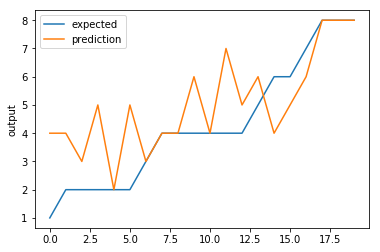

In [48]:
#plt.scatter(y_test1,y_pred_LR)
chart_regression(y_pred_LR[:20].flatten(),y_test1[:20],sort=True)

# Nearest Neighbor KNN

In [56]:
knn = KNeighborsClassifier(n_neighbors=10)

In [57]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')


In [ ]:
knn.fit(x_train, y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [ ]:
y_pred_knn = knn.predict(x_test)

In [ ]:
decode_y_knn = (labelencoder.inverse_transform(y_pred_knn)[:10])
decode_y_knn

In [ ]:
ypred_knn = pd.DataFrame({'Prediction': pd.Series(decode_y_knn)})
df_knn = pd.concat([newmerge[['business_id','stars']][:10], ypred_knn[:10]], axis=1)
df_knn

In [ ]:
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test1, y_pred_knn,average='micro'))

In [ ]:
#plt.scatter(y_test1,y_pred_knn)
chart_regression(y_pred[:20].flatten(),y_test1[:20],sort=True)

# Support Vector Machine

In [57]:
model = svm.SVC() 

In [58]:
model.fit(x_train, y_train1)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [59]:
y_pred_SVM = model.predict(x_test)

In [60]:
ypred_svm = pd.DataFrame({'Prediction': pd.Series(y_pred_SVM)})
ypred_svm = pd.concat([newmerge[['business_id','stars']][:5], ypred_svm[:5]], axis=1)
ypred_svm

,business_id,stars,Prediction
0,1SWheh84yJXfytovILXOAQ,3.0,5
1,QXAEGFB4oINsVuTFxEYKFQ,2.5,5
2,gnKjwL_1w79qoiV3IC_xQQ,4.0,5
3,xvX2CttrVhyG2z1dFg_0xw,5.0,5
4,HhyxOkGAM07SRYtlQ4wMFQ,4.0,5


In [61]:
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test1, y_pred_SVM, average='micro'))

Evaluating with F1 score metric: 0.19


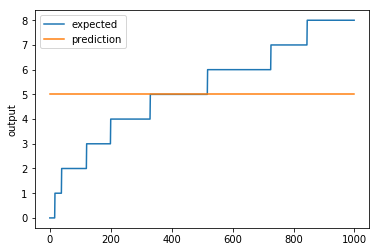

In [62]:
chart_regression(y_pred_SVM.flatten(),y_test1,sort=True)

# Multinomial Naive Bayes

In [49]:
nb = MultinomialNB()

In [50]:
 scaler_mat = MinMaxScaler()
    

In [51]:
r_min_max = scaler_mat.fit_transform(review_arr)
r_min_max.shape

(192606, 1001)

In [52]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(r_min_max,review_stars_LR, test_size=0.2,random_state=42)

In [53]:
nb.fit(x_train1,y_train1)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [54]:
y_predict_nb = nb.predict(x_test1)

In [57]:
decode_y = (labelencoder.inverse_transform(y_predict_nb)[:5])
ypred_nb = pd.DataFrame({'Prediction': pd.Series(decode_y)})
df_total_new = pd.concat([newmerge[['business_id','stars']][:5], ypred_nb[:5]], axis=1)
df_total_new

,business_id,stars,Prediction
0,1SWheh84yJXfytovILXOAQ,3.0,3.5
1,QXAEGFB4oINsVuTFxEYKFQ,2.5,2.5
2,gnKjwL_1w79qoiV3IC_xQQ,4.0,5
3,xvX2CttrVhyG2z1dFg_0xw,5.0,3
4,HhyxOkGAM07SRYtlQ4wMFQ,4.0,3


In [106]:
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test1, y_predict_nb,average='micro'))

Evaluating with F1 score metric: 0.33


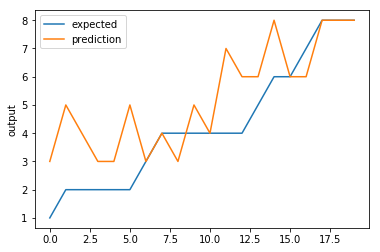

In [59]:
chart_regression(y_predict_nb[:20].flatten(),y_test1[:20],sort=True)

# Extra feature

In [72]:
outfile_e = open("business.tsv",'w')
efile = csv.writer(outfile_e, delimiter ="\t", quoting=csv.QUOTE_MINIMAL)
efile.writerow(['business_id','review_count','stars','categories'])
with open('business.json') as f:
    for line in f:
                row1 = json.loads(line)
# some special char must be encoded in 'utf-8'
                efile.writerow([row1['business_id'],row1['review_count'],row1['stars'],row1['categories']])
    outfile_e.close()
    df_extra= pd.read_csv('business.tsv', delimiter ="\t", encoding="utf-8")

In [73]:
df_extra.head()

,business_id,review_count,stars,categories
0,1SWheh84yJXfytovILXOAQ,5,3.0,"Golf, Active Life"
1,QXAEGFB4oINsVuTFxEYKFQ,128,2.5,"Specialty Food, Restaurants, Dim Sum, Imported..."
2,gnKjwL_1w79qoiV3IC_xQQ,170,4.0,"Sushi Bars, Restaurants, Japanese"
3,xvX2CttrVhyG2z1dFg_0xw,3,5.0,"Insurance, Financial Services"
4,HhyxOkGAM07SRYtlQ4wMFQ,4,4.0,"Plumbing, Shopping, Local Services, Home Servi..."


## group data of restaurant category

In [74]:
df_new=pd.DataFrame(df_extra[df_extra['categories'].str.contains('Restaurants')==True])
df_new.style

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [75]:
newmerge_e= pd.merge(df_new, df_ready_for_sklearn, on='business_id')
newmerge_e.head()

,business_id,review_count,stars,categories,all_reviews
0,QXAEGFB4oINsVuTFxEYKFQ,128,2.5,"Specialty Food, Restaurants, Dim Sum, Imported...",b'My girlfriend and I went for dinner at Emera...
1,gnKjwL_1w79qoiV3IC_xQQ,170,4.0,"Sushi Bars, Restaurants, Japanese",b'Husband was craving Chicken Teriyaki & gyoza...
2,1Dfx3zM-rW4n-31KeC8sJg,18,3.0,"Restaurants, Breakfast & Brunch, Mexican, Taco...","b'I mean it\'s Taco Bell, so it is what it is...."
3,fweCYi8FmbJXHCqLnwuk8w,16,4.0,"Italian, Restaurants, Pizza, Chicken Wings","b'Hands down, this is the best pizza place in ..."
4,PZ-LZzSlhSe9utkQYU8pFg,40,4.0,"Restaurants, Italian","b'We went there for dinner the other night, be..."


In [76]:
extra_rev_df = newmerge_e[['review_count','all_reviews']]

In [77]:
vectorizer_extra = tfidf.TfidfVectorizer(stop_words='english',max_features = 1000,min_df = 5)

In [78]:
matrix_extra = vectorizer_extra.fit_transform(extra_rev_df['all_reviews'])

In [79]:
rest_array = matrix_extra.toarray() 

In [80]:
extra_rev_df['review_count'] = zscore(extra_rev_df['review_count'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [81]:
extra_df_toarray = extra_rev_df['review_count'].values
extra_df_toarray

array([ 0.33710005,  0.574879  , -0.28565433, ..., -0.36491398,
       -0.24602451, -0.16676486])

In [82]:
extra_array = np.column_stack((extra_df_toarray,rest_array))

In [83]:
x_train_e,x_test_e,y_train_e,y_test_e = train_test_split(extra_array[:5000],star_rating_arr[:5000], test_size=0.2,random_state=42)

### linear regression

In [84]:

linear_reg_extra = linear_model.LinearRegression()

In [85]:
linear_reg_extra.fit(x_train_e,y_train_e)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
y_pred_e = linear_reg_extra.predict(x_test_e)


In [87]:
ypred_linear_reg_e = pd.DataFrame({'Prediction': pd.Series(y_pred_e)})
ypred_linear_reg_e.head()

,Prediction
0,3.793086
1,3.543240
2,3.416182
3,3.535640
4,4.538569


In [88]:
ypred_linear_reg_e = pd.DataFrame({'Prediction': pd.Series(y_pred_e)})
linear_regression_e = pd.concat([newmerge_e[['business_id','stars']][:5], ypred_linear_reg_e[:5]], axis=1)
linear_regression_e

,business_id,stars,Prediction
0,QXAEGFB4oINsVuTFxEYKFQ,2.5,3.793086
1,gnKjwL_1w79qoiV3IC_xQQ,4.0,3.543240
2,1Dfx3zM-rW4n-31KeC8sJg,3.0,3.416182
3,fweCYi8FmbJXHCqLnwuk8w,4.0,3.535640
4,PZ-LZzSlhSe9utkQYU8pFg,4.0,4.538569


In [89]:
error_e = np.sqrt(mean_squared_error(y_test_e, y_pred_e))

In [90]:
print("Root Mean squared error: %.2f" % error_e)
# Explained variance score: 1 is perfect prediction
print('R2 score %.2f' % r2_score(y_test_e, y_pred_e))

Root Mean squared error: 1.16
R2 score -0.36


### logistic regression

In [91]:

logreg_extra = LogisticRegression()

In [92]:
labelencoder_extra = LabelEncoder()

In [93]:
stars_e = newmerge_e.values

In [94]:
stars_e[:, 2] = labelencoder_extra.fit_transform(stars_e[:, 2])

review_merge_extra = pd.DataFrame(stars_e)
review_merge_extra.head()

,0,1,2,3,4
0,QXAEGFB4oINsVuTFxEYKFQ,128,3,"Specialty Food, Restaurants, Dim Sum, Imported...",b'My girlfriend and I went for dinner at Emera...
1,gnKjwL_1w79qoiV3IC_xQQ,170,6,"Sushi Bars, Restaurants, Japanese",b'Husband was craving Chicken Teriyaki & gyoza...
2,1Dfx3zM-rW4n-31KeC8sJg,18,4,"Restaurants, Breakfast & Brunch, Mexican, Taco...","b'I mean it\'s Taco Bell, so it is what it is...."
3,fweCYi8FmbJXHCqLnwuk8w,16,6,"Italian, Restaurants, Pizza, Chicken Wings","b'Hands down, this is the best pizza place in ..."
4,PZ-LZzSlhSe9utkQYU8pFg,40,6,"Restaurants, Italian","b'We went there for dinner the other night, be..."


In [95]:
review_stars_e = review_merge_extra[2].values
review_stars_e = review_stars_e.astype('int')

In [96]:
x_train_e,x_test_e,y_train_t2,y_test_t2 = train_test_split(extra_array[:5000],review_stars_e[:5000], test_size=0.2,random_state=42)

In [97]:
type(x_train_e)

numpy.ndarray

In [98]:
logreg_extra.fit(x_train_e, y_train_t2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [99]:
y_pred_extra=logreg_extra.predict(x_test_e)

In [100]:
decode_y_extra = (labelencoder.inverse_transform(y_pred_extra)[:10])
decode_y_extra

array([4.0, 3.0, 3.5, 4.0, 4.0, 4.0, 3.5, 4.5, 3.5, 3.0], dtype=object)

In [101]:
ypred_LR_e = pd.DataFrame({'Prediction': pd.Series(decode_y_extra)})
log_regression_e = pd.concat([newmerge_e[['business_id','stars']][:5], ypred_LR_e[:5]], axis=1)
log_regression_e

,business_id,stars,Prediction
0,QXAEGFB4oINsVuTFxEYKFQ,2.5,4
1,gnKjwL_1w79qoiV3IC_xQQ,4.0,3
2,1Dfx3zM-rW4n-31KeC8sJg,3.0,3.5
3,fweCYi8FmbJXHCqLnwuk8w,4.0,4
4,PZ-LZzSlhSe9utkQYU8pFg,4.0,4


In [103]:
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test_t2, y_pred_extra,average='micro'))

Evaluating with F1 score metric: 0.37


In [113]:
score_c = metrics.accuracy_score(y_test_t2, pred_c)
print("Accuracy score: {}".format(score_c))

score_tf_precision_stopping = metrics.precision_score(y_test_t2, pred_c, average= "weighted")
print("Precision score: {}".format(score_tf_precision_stopping))


score_tf_recall_stopping = metrics.recall_score(y_test_t2, pred_c, average= "weighted")
print("Recall score: {}".format(score_tf_recall_stopping))


score_tf_f1_stopping = metrics.f1_score(y_test_t2, pred_c, average= "weighted")
print("F1 score: {}".format(score_tf_f1_stopping))



NameError: name 'y_test_t2' is not defined

### k nearest neighbour

In [104]:
#knn
knn_extra = KNeighborsClassifier(n_neighbors=10)


In [105]:
knn_extra.fit(x_train_e, y_train_t2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [106]:
y_pred_knn_e = knn_extra.predict(x_test_e)

In [107]:
decode_y_knn_extra = (labelencoder.inverse_transform(y_pred_knn_e)[:10])
decode_y_knn_extra

array([3.5, 3.5, 4.0, 3.5, 4.0, 4.5, 3.0, 3.5, 4.5, 2.5], dtype=object)

In [108]:
ypred_knn_e = pd.DataFrame({'Prediction': pd.Series(decode_y_knn_extra)})
knn_e = pd.concat([newmerge_e[['business_id','stars']][:5], ypred_knn_e[:5]], axis=1)
knn_e

,business_id,stars,Prediction
0,QXAEGFB4oINsVuTFxEYKFQ,2.5,3.5
1,gnKjwL_1w79qoiV3IC_xQQ,4.0,3.5
2,1Dfx3zM-rW4n-31KeC8sJg,3.0,4
3,fweCYi8FmbJXHCqLnwuk8w,4.0,3.5
4,PZ-LZzSlhSe9utkQYU8pFg,4.0,4


In [109]:
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test_t2, y_pred_knn_e,average='micro'))

Evaluating with F1 score metric: 0.27


### SVM

In [110]:
#svm
model_extra = svm.SVC() 

In [111]:
model_extra.fit(x_train_e, y_train_t2)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [112]:
y_pred_SVM_e = model_extra.predict(x_test_e)

In [113]:
ypred_svm_e = pd.DataFrame({'Prediction': pd.Series(y_pred_SVM_e)})
ypred_svm_e = pd.concat([newmerge[['business_id','stars']][:5], ypred_svm_e[:5]], axis=1)
ypred_svm_e

,business_id,stars,Prediction
0,1SWheh84yJXfytovILXOAQ,3.0,6
1,QXAEGFB4oINsVuTFxEYKFQ,2.5,6
2,gnKjwL_1w79qoiV3IC_xQQ,4.0,6
3,xvX2CttrVhyG2z1dFg_0xw,5.0,6
4,HhyxOkGAM07SRYtlQ4wMFQ,4.0,6


In [115]:
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test_t2, y_pred_SVM_e,average='micro'))

Evaluating with F1 score metric: 0.23


## Extra feature 2 - Combining tips.json 

In [60]:
outfile2 = open("buisness_tip.tsv",'w')
tfile = csv.writer(outfile2, delimiter ="\t", quoting=csv.QUOTE_MINIMAL)
tfile.writerow(['business_id','text'])
with open('tip.json') as f:
    for line in f:
                row2 = json.loads(line)
# some special char must be encoded in 'utf-8'
                tfile.writerow([row2['business_id'],row2['text']])
    outfile2.close()
    df2= pd.read_csv('buisness_tip.tsv', delimiter ="\t", encoding="utf-8")

In [61]:
df2.head()
df2.shape

(1223094, 2)

In [62]:
df2['business_id']=df2['business_id'].astype(str)
df2['text']=df2['text'].astype(str)

In [63]:
df2_review_agg = df2.groupby('business_id')['text'].sum()
df2_ready_for_sklearn = pd.DataFrame({'business_id': df2_review_agg.index, 'all_tips': df2_review_agg.values})


In [64]:
newmerge_tip= pd.merge(newmerge, df2_ready_for_sklearn, on='business_id')
newmerge_tip.head()

,business_id,review_count,stars,all_reviews,all_tips
0,1SWheh84yJXfytovILXOAQ,5,3.0,"b""Don't go here if you expect consistent or re...",Played for the first there this past weekend a...
1,QXAEGFB4oINsVuTFxEYKFQ,128,2.5,b'My girlfriend and I went for dinner at Emera...,"Spring & egg rolls are great, get them with ex..."
2,gnKjwL_1w79qoiV3IC_xQQ,170,4.0,b'Husband was craving Chicken Teriyaki & gyoza...,"Tonkatsu Ramen!!!Ramen, Gyoza, miso soup and g..."
3,68dUKd8_8liJ7in4aWOSEA,3,2.5,b'horrible. do not go. staff is dishonest and...,Good service
4,5JucpCfHZltJh5r1JabjDg,7,3.5,b'OK place- I\'ve gone for a couple of years a...,George does the best gel nails!!!


In [65]:
tip_rev_df = newmerge_tip[['review_count','all_reviews','all_tips']]

In [66]:
#vectorize all_reviews
review_vectorizer = tfidf.TfidfVectorizer(stop_words='english',max_features = 1000,min_df = 10)

In [67]:
#vectorize tip_reviews
tip_vectorizer = tfidf.TfidfVectorizer(stop_words='english',max_features = 100,min_df = 5)

In [68]:
matrix1 = review_vectorizer.fit_transform(tip_rev_df['all_reviews'])

In [69]:
matrix2 = tip_vectorizer.fit_transform(tip_rev_df['all_tips'])

In [70]:
r_array = matrix1.toarray() 


In [71]:
t_array = matrix2.toarray() 


In [72]:
tip_rev_df['review_count'] = zscore(tip_rev_df['review_count'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
tip_df_toarray = tip_rev_df['review_count'].values
tip_df_toarray

array([-0.3218743 ,  0.58996536,  0.90132524, ..., -0.33670096,
       -0.24774099, -0.33670096])

In [75]:
t_arr = np.column_stack((tip_df_toarray,t_array,r_array))
t_arr.shape

(123996, 1101)

In [76]:
star_rating_arr_tip = newmerge_tip['stars'].values
star_rating_arr_tip.shape

(123996,)

In [78]:
x_train_t,x_test_t,y_train_t,y_test_t = train_test_split(t_arr,star_rating_arr_tip, test_size=0.2,random_state=42)

### linear regression

In [79]:
#linear regression
linear_reg_tip = linear_model.LinearRegression()

In [80]:
linear_reg_tip.fit(x_train_t,y_train_t)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
y_pred_t = linear_reg_tip.predict(x_test_t)

In [82]:
error_t = np.sqrt(mean_squared_error(y_test_t, y_pred_t))

In [83]:
print("Root Mean squared error: %.2f" % error_t)
# Explained variance score: 1 is perfect prediction
print('R2 score %.2f' % r2_score(y_test_t, y_pred_t))

Root Mean squared error: 0.45
R2 score 0.75


In [84]:
ypred_linear_reg_tip = pd.DataFrame({'Prediction': pd.Series(y_pred_t)})
total_linear_regression = pd.concat([newmerge_tip[['business_id','stars']][:5], ypred_linear_reg_tip[:5]], axis=1)
total_linear_regression

,business_id,stars,Prediction
0,1SWheh84yJXfytovILXOAQ,3.0,4.085172
1,QXAEGFB4oINsVuTFxEYKFQ,2.5,4.331263
2,gnKjwL_1w79qoiV3IC_xQQ,4.0,4.379892
3,68dUKd8_8liJ7in4aWOSEA,2.5,2.988605
4,5JucpCfHZltJh5r1JabjDg,3.5,2.859135


### logistic regression

In [85]:
#logistic regression
logreg_tip = LogisticRegression()

In [86]:
labelencoder_tip = LabelEncoder()

In [87]:
stars = newmerge_tip.values

In [88]:
stars[:, 2] = labelencoder_tip.fit_transform(stars[:, 2])
review_merge_tip = pd.DataFrame(stars)
review_merge_tip.head()

,0,1,2,3,4
0,1SWheh84yJXfytovILXOAQ,5,4,"b""Don't go here if you expect consistent or re...",Played for the first there this past weekend a...
1,QXAEGFB4oINsVuTFxEYKFQ,128,3,b'My girlfriend and I went for dinner at Emera...,"Spring & egg rolls are great, get them with ex..."
2,gnKjwL_1w79qoiV3IC_xQQ,170,6,b'Husband was craving Chicken Teriyaki & gyoza...,"Tonkatsu Ramen!!!Ramen, Gyoza, miso soup and g..."
3,68dUKd8_8liJ7in4aWOSEA,3,3,b'horrible. do not go. staff is dishonest and...,Good service
4,5JucpCfHZltJh5r1JabjDg,7,5,b'OK place- I\'ve gone for a couple of years a...,George does the best gel nails!!!


In [91]:
review_stars_tip = review_merge_tip[2].values
review_stars_tip.shape

(123996,)

In [94]:
review_stars_tip = review_stars_tip.astype('int')

In [95]:
x_train_t,x_test_t,y_train_t1,y_test_t1 = train_test_split(t_arr,review_stars_tip,test_size=0.2,random_state=42)

In [96]:
logreg_tip.fit(x_train_t, y_train_t1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [97]:
y_pred_tip=logreg_tip.predict(x_test_t)

In [98]:
decode_y_tip = (labelencoder.inverse_transform(y_pred_tip)[:10])
decode_y_tip

array([4.5, 4.0, 4.0, 3.0, 3.0, 4.0, 4.0, 4.0, 2.5, 3.5], dtype=object)

In [99]:
ypred_LR_t = pd.DataFrame({'Prediction': pd.Series(decode_y_tip)})
log_regression_t = pd.concat([newmerge_tip[['business_id','stars']][:5], ypred_LR_t[:5]], axis=1)
log_regression_t

,business_id,stars,Prediction
0,1SWheh84yJXfytovILXOAQ,3.0,4.5
1,QXAEGFB4oINsVuTFxEYKFQ,2.5,4
2,gnKjwL_1w79qoiV3IC_xQQ,4.0,4
3,68dUKd8_8liJ7in4aWOSEA,2.5,3
4,5JucpCfHZltJh5r1JabjDg,3.5,3


In [100]:
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test_t1, y_pred_tip,average='micro'))

Evaluating with F1 score metric: 0.44


In [115]:
score_t = metrics.accuracy_score(y_test_t1, y_pred_tip)
print("Accuracy score: {}".format(score_t))

score_tf_precision_stopping = metrics.precision_score(y_test_t1, y_pred_tip, average= "weighted")
print("Precision score: {}".format(score_tf_precision_stopping))


score_tf_recall_stopping = metrics.recall_score(y_test_t1, y_pred_tip, average= "weighted")
print("Recall score: {}".format(score_tf_recall_stopping))


score_tf_f1_stopping = metrics.f1_score(y_test_t1,y_pred_tip, average= "weighted")
print("F1 score: {}".format(score_tf_f1_stopping))

Accuracy score: 0.44411290322580643
Precision score: 0.43671506318833003
Recall score: 0.44411290322580643
F1 score: 0.43443185300869447


### knn

In [150]:
#knn
knn_tip = KNeighborsClassifier(n_neighbors=10)


In [151]:
knn_tip.fit(x_train_t, y_train_t1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [152]:
y_pred_knn_t = knn_tip.predict(x_test_t)

In [153]:
decode_y_tip_knn = (labelencoder.inverse_transform(y_pred_knn_t)[:10])
decode_y_tip_knn

array([3.0, 5.0, 4.0, 3.5, 4.0, 4.5, 2.5, 1.5, 3.0, 3.0], dtype=object)

In [154]:
ypred_knn_t = pd.DataFrame({'Prediction': pd.Series(decode_y_tip_knn)})
knn_t = pd.concat([newmerge_tip[['business_id','stars']][:5], ypred_knn_t[:5]], axis=1)
knn_t

,business_id,stars,Prediction
0,1SWheh84yJXfytovILXOAQ,3.0,3
1,QXAEGFB4oINsVuTFxEYKFQ,2.5,5
2,gnKjwL_1w79qoiV3IC_xQQ,4.0,4
3,68dUKd8_8liJ7in4aWOSEA,2.5,3.5
4,5JucpCfHZltJh5r1JabjDg,3.5,4


In [155]:
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test_t1, y_pred_knn_t,average='micro'))

Evaluating with F1 score metric: 0.24


### svm

In [156]:
#svm

model_tip = svm.SVC() 

In [157]:
model_tip.fit(x_train_t, y_train_t1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [158]:
y_pred_SVM_t = model_tip.predict(x_test_t)

In [159]:
ypred_svm_t = pd.DataFrame({'Prediction': pd.Series(y_pred_SVM_t)})
svm_t = pd.concat([newmerge_tip[['business_id','stars']][:5], ypred_svm_t[:5]], axis=1)
svm_t

,business_id,stars,Prediction
0,1SWheh84yJXfytovILXOAQ,3.0,6
1,QXAEGFB4oINsVuTFxEYKFQ,2.5,6
2,gnKjwL_1w79qoiV3IC_xQQ,4.0,6
3,68dUKd8_8liJ7in4aWOSEA,2.5,6
4,5JucpCfHZltJh5r1JabjDg,3.5,6


In [160]:
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test_t1, y_pred_SVM_t,average='micro'))

Evaluating with F1 score metric: 0.25
